In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
train_dir = 'Emotion2/train'
valid_dir = 'Emotion2/test'

In [3]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True, rotation_range=0.2, zoom_range=0.2, shear_range=0.2)
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32)
valid_data = valid_gen.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Exploratory Data Analysis (EDA)

In [24]:
class_name = list(train_data.class_indices.keys())
class_name

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

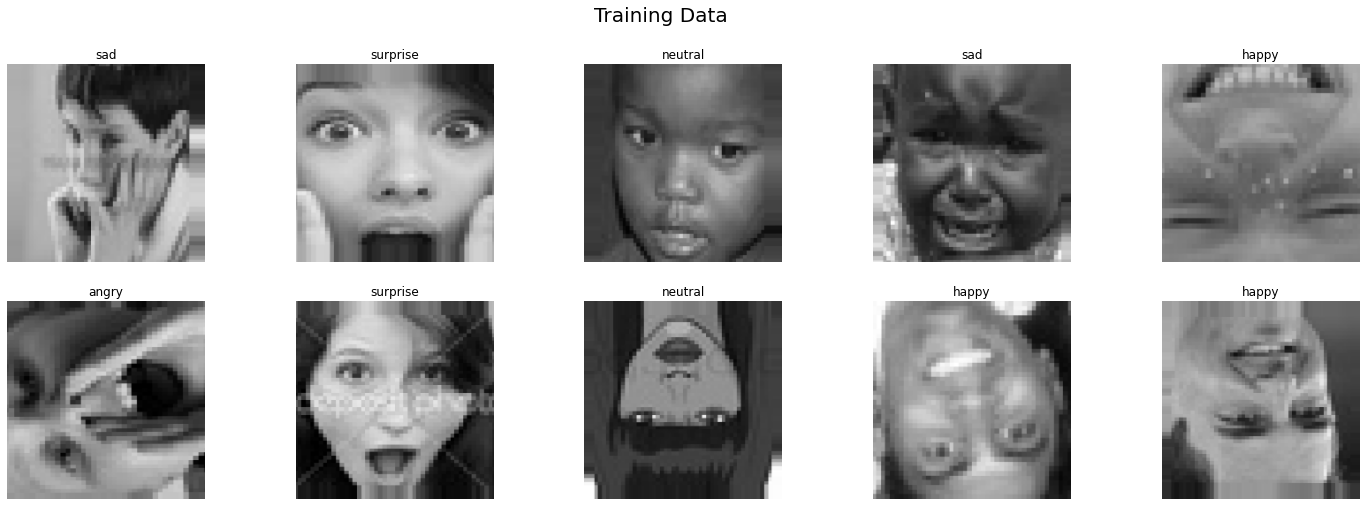

In [23]:
plt.figure(figsize=(25, 8))
plt.suptitle('Training Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(class_name[np.argmax(train_data[i][1][0])])
    plt.axis('off')
plt.show()

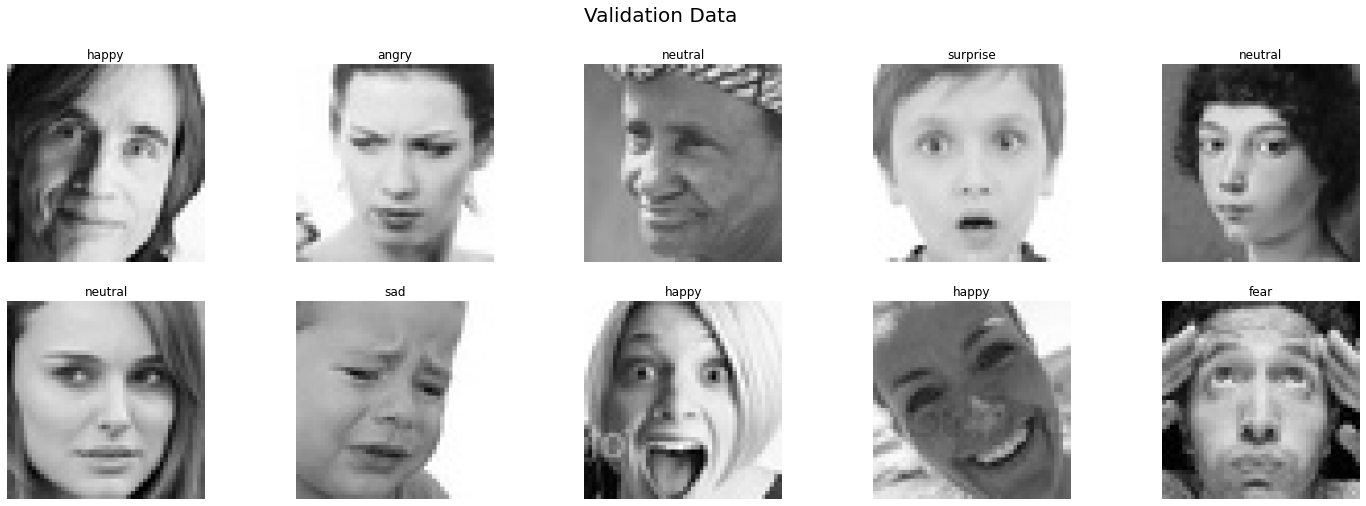

In [25]:
plt.figure(figsize=(25, 8))
plt.suptitle('Validation Data', fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(valid_data[i][0][0])
    plt.title(class_name[np.argmax(valid_data[i][1][0])])
    plt.axis('off')
plt.show()

## Modeling

In [26]:
pretrained = keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
pretrained.trainable = False

In [27]:
model = Sequential()
model.add(pretrained)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True), keras.callbacks.ModelCheckpoint('Emotion2_model.h5', monitor='val_loss', save_best_only=True)]

In [30]:
history = model.fit(train_data, validation_data=valid_data, epochs=10, callbacks=callback)

Epoch 1/10
898/898 [==============================] - 1167s 1s/step - loss: 1.8940 - accuracy: 0.2268 - val_loss: 1.7802 - val_accuracy: 0.2757
Epoch 2/10
898/898 [==============================] - 1138s 1s/step - loss: 1.8019 - accuracy: 0.2531 - val_loss: 1.7805 - val_accuracy: 0.2595
Epoch 3/10
898/898 [==============================] - 1130s 1s/step - loss: 1.8007 - accuracy: 0.2550 - val_loss: 1.7664 - val_accuracy: 0.2673
Epoch 4/10
898/898 [==============================] - 1088s 1s/step - loss: 1.7976 - accuracy: 0.2580 - val_loss: 1.7786 - val_accuracy: 0.2602
Epoch 5/10
898/898 [==============================] - 1124s 1s/step - loss: 1.7876 - accuracy: 0.2605 - val_loss: 1.7952 - val_accuracy: 0.2544
Epoch 6/10
898/898 [==============================] - 1115s 1s/step - loss: 1.7805 - accuracy: 0.2619 - val_loss: 1.7699 - val_accuracy: 0.2664
